# Finance: Who will most likley Churn?

### Author: Harry Patterson

                                ====================================================

## Table of Contents

### The Overview
- [Who will churn?](#problem)
- [What is trying to be accoplished?](#Objective)

### Data Quality check
- [Simple Inspection of the data](#DataQuality)
- [Data Cleaning](#DataCleaning)


### Descriptive Statistics
- [Summary Statistics, Click Rate, Size of Data](#Descriptive_Statistics)

### Exploratory Data Analysis
- [Explore Binary Data](#Binary)
- [Explore Correlations](#Correlation)
- [Correlation Matrix](#CM)

### Feature engineering
- [Removing Data](#RD)
- [One Hot Encoding](#One)
- [Train_Test Split](#train_test)
- [Feature Scaling](#FS)


### Model Selection
- [Model Selection](#ms)
- [Logistic Regression](#lr)


### Conclusion
- [The Report](#Report)
- [Final Remarks](#conclusion)

***

<a id='problem'></a>
# The Problem: 

- Subscription products often are the main source of revenue for companies across all industries. These companies try to minimize customer's subscriptions cancellations. 
- The market is the target audience of the entirety of a company's subscription base. Which are the ones companies want to keep. 
- The subscription products that customers are already enrolled in can provide value that users may not have imagined, or that they may have forgotten. 
- This Fintech company provides a finance subscription product that allows customers to manage their bank accounts (savings, credit cards, etc.). Fintech would like for us help them identify users who are likely to cancel their cubscription so that they can build new features that subscribers may be interested in. 

***

<a id='Objective'></a>
# The Objective

- To predict which users are likely to churn, so that the company can focus on re-engaging these users with the product. 
- To understand what factors contributed most to a customer churning.
- Increase Fintech engagement and interest of their users towards the product. 
***

### Data Description of each Columns

- userid - MongoDB userid
- churn  - Active = No | Suspended < 30 = No Else Churn = Yes
- age - age of the customer
- city - city of the customer
- state- state where the customer lives
- postal_code - zip code of the customer
- zodiac_sign- zodiac sign of the customer
- rent_or_own - Does the customer rents or owns a house 
- more_than_one_mobile_device - does the customer use more than one mobile device
- payFreq- Pay Frequency of the cusomter
- in_collections - is the customer in collections
- loan_pending - is the loan pending
- withdrawn_application - has the customer withdrawn the loan applicaiton 
- paid_off_loan- has the customer paid of the loan
- did_not_accept_funding - customer did not accept funding
- cash_back_engagement - Sum of cash back dollars received by a customer / No of days in the app
- cash_back_amount - Sum of cash back dollars received by a customer
- used_ios- Has the user used an iphone
- used_android - Has the user used a android based phone
- has_used_mobile_and_web - Has the user used mobile and web platforms
- has_used_web - Has the user used MoneyLion Web app
- has_used_mobile - as the user used MoneyLion  app
- has_reffered- Has the user referred
- cards_clicked - How many times a user has clicked the cards
- cards_not_helpful- How helpful was the cards
- cards_helpful- How helpful was the cards
- cards_viewed- How many times a user viewed the cards
- cards_share- How many times a user shared his cards
- trivia_view_results-How many times a user viewed trivia results
- trivia_view_unlocked- How many times a user viewed trivia view unlocked screen
- trivia_view_locked - How many times a user viewed trivia view locked screen
- trivia_shared_results- How many times a user shared trivia results 
- trivia_played - How many times a user played trivia 
- re_linked_account- Has the user re linked account
- un_linked_account - Has the user un linked account
- credit_score - Customer's credit score

***

In [109]:
### Functions to use 

def creating_histplot(size, data, features):    # (size:(length, height))
    plt.figure(figsize=size)
    for i in range(len(features)):
        plt.subplot(9, 3, i+1)                  # (rows, columns)
        sns.histplot(data[features[i]], kde = True)
        
        
def crossCorrelation(data):
    corr = data.corr()
    plt.figure(figsize=(20,20))
    sns.heatmap(corr,annot=True,
          xticklabels=corr.columns.values,
          yticklabels=corr.columns.values)
    print(corr)

### IMPORT LIBRARIES

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

### Read the Data

In [4]:
fintech_churn = pd.read_csv('Data/churn_data.csv')
fintech_churn.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


<a id='DataQuality'></a>
# Data Quality Check

***

In [5]:
fintech_churn.shape

(27000, 31)

In [6]:
fintech_churn.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [7]:
fintech_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [8]:
fintech_churn.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [9]:
fintech_churn.describe(include='O')

,housing,payment_type,zodiac_sign
count,27000,27000,27000
unique,3,5,13
top,na,Bi-Weekly,Cancer
freq,13860,12716,2424


In [10]:
# Looking at the distribution of the target feature
# Percentage of churn or not

churn_rate = fintech_churn['churn'].value_counts() / fintech_churn.shape[0]
churn_rate

0    0.586148
1    0.413852
Name: churn, dtype: float64

In [11]:
churn_summary = fintech_churn.groupby('churn')
churn_summary.mean()

,user,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
churn,,,,,,,,,,,,,,,,,,,,,
0,34253.462277,32.749210,548.957897,4.379881,0.367749,37.310186,4.295590,0.052319,107.441868,0.043726,...,0.398964,0.001706,0.014786,0.012574,0.001580,0.171806,0.014028,32.169607,1.013219,0.350626
1,37078.725076,31.470467,534.344350,1.870950,0.220959,14.964829,1.825846,0.104170,71.641400,0.060408,...,0.452032,0.000716,0.024521,0.026132,0.009576,0.175765,0.023805,24.503004,0.758213,0.271881


### Results 

- Distributions from a quick view looks pretty normal 
- Dataset Does not seem to be too unbalanced

***

<a id='DataCleaning'></a>
# Data Cleaning: 

***

In [12]:
# Removing nan

fintech_churn.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [13]:
# Will return all rows in the age column that are not null

fintech_churn = fintech_churn[pd.notnull(fintech_churn['age'])]

In [14]:
# Get rid of the credit score and rewards_earned columns 

fintech_churn = fintech_churn.drop(columns= ['credit_score','rewards_earned'])

In [15]:
# Check work

fintech_churn.isna().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

### Results: 

- Decided to remove credit score and rewards_earned entire column because their are too many missing values 
- We will only remove the 4 missing rows in age

***

<a id='Descriptive_Statistics'></a>
# Descriptive Statistics
***

In [16]:
# Drop columns we do not need at the moment 

churn_visuals = fintech_churn.drop(columns= ['user','churn'])

In [17]:
churn_visuals.shape

(26996, 27)

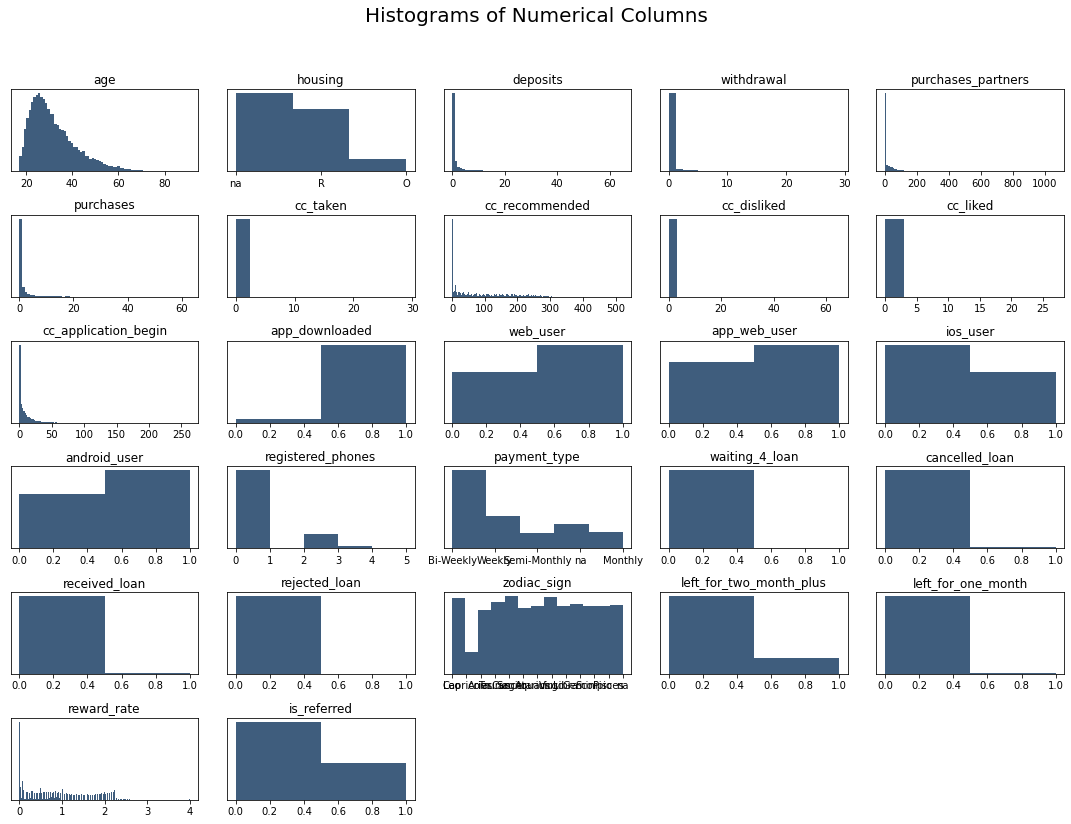

In [18]:
# [1] - skips the last element 


fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, churn_visuals.shape[1] + 1):           # iterate each of the columns, we start at 1 and go through the number of columns plus 1  
    plt.subplot(6, 5, i)                                 # 6 rows 5 columns 
    f = plt.gca()                                        # Plot each figure 
    f.axes.get_yaxis().set_visible(False)                # Get rid of y labels 
    f.set_title(churn_visuals.columns.values[i - 1])     # Give each individual its subplot by selecting the coloumn values

    vals = np.size(churn_visuals.iloc[:, i - 1].unique())          # this vals here is to create as many bins as we want 
    
    plt.hist(churn_visuals.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])                                 # rect - gives it rectangle to avoid overlap

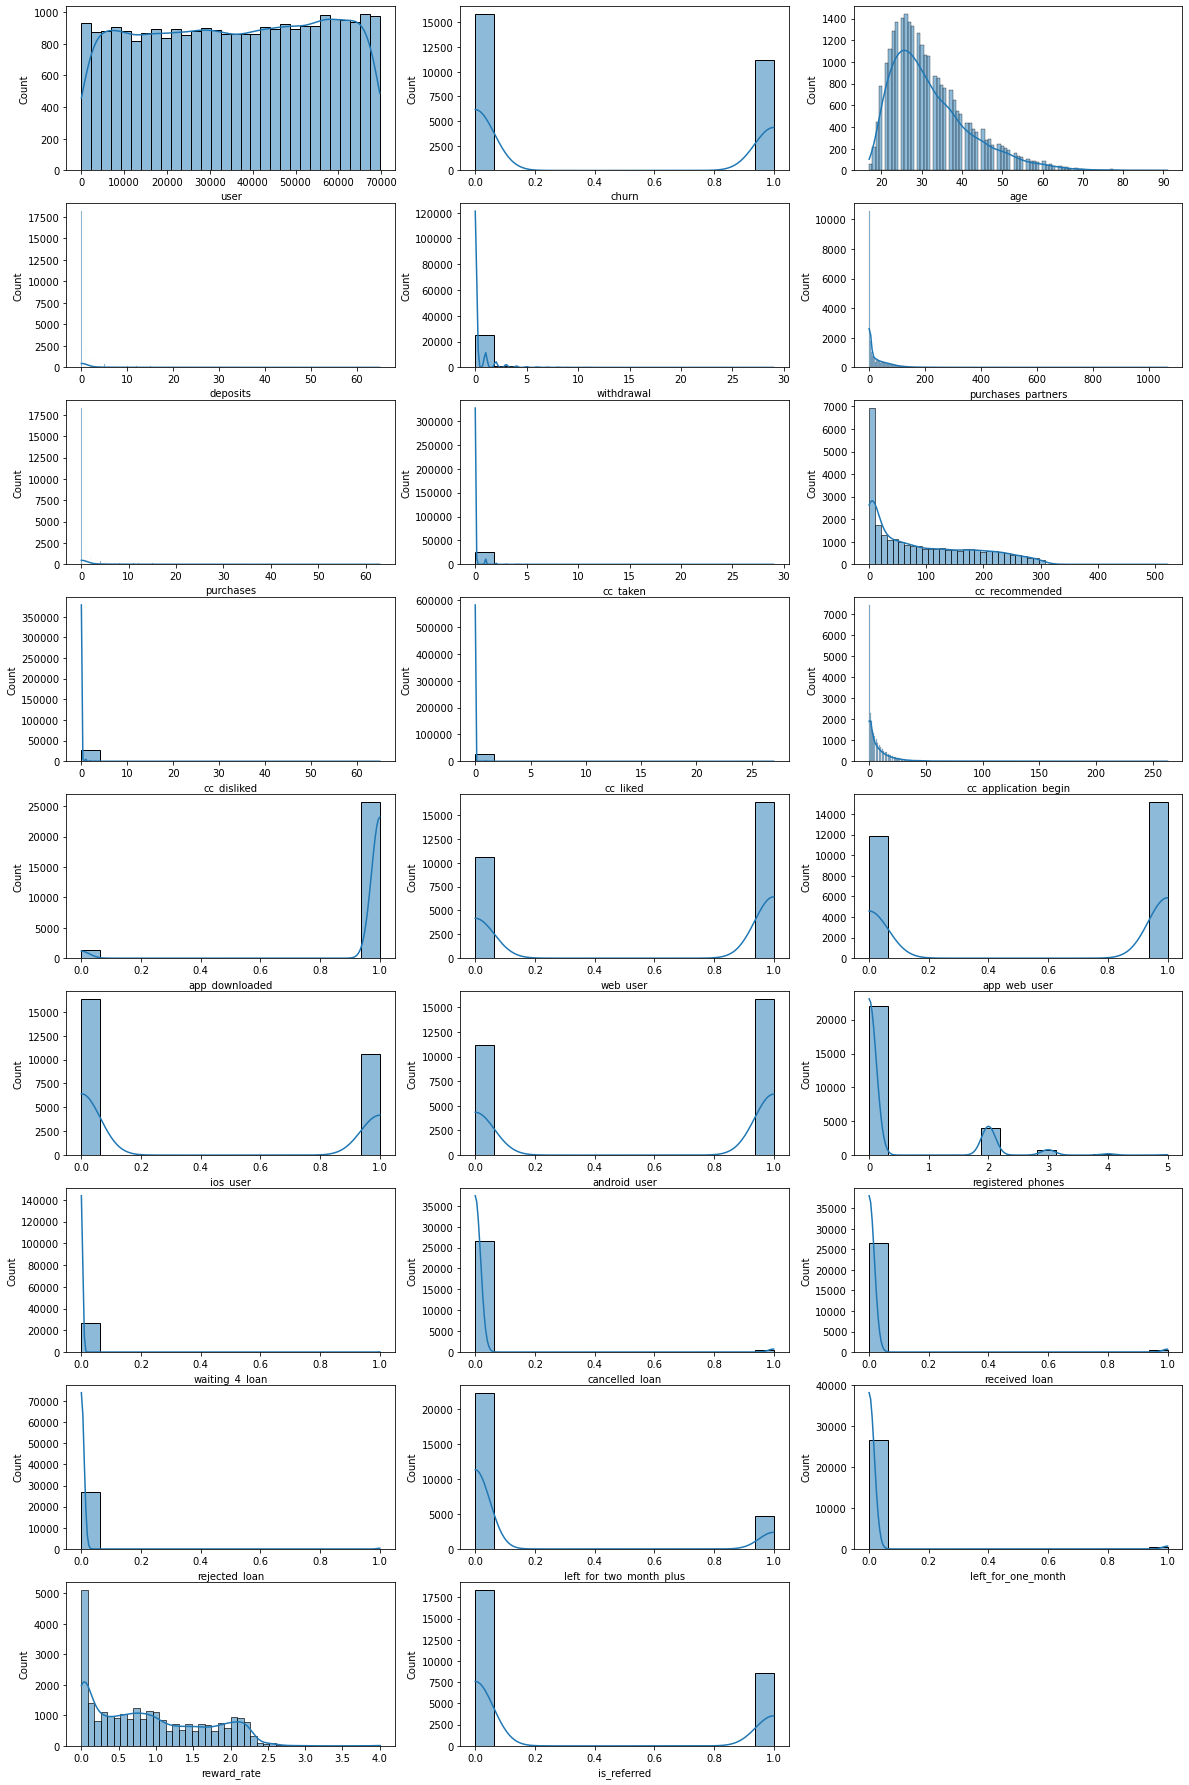

In [33]:
num_vars = fintech_churn.select_dtypes(exclude=['object']).columns

# Creating distribution plots
creating_histplot((20,32), fintech_churn, num_vars)

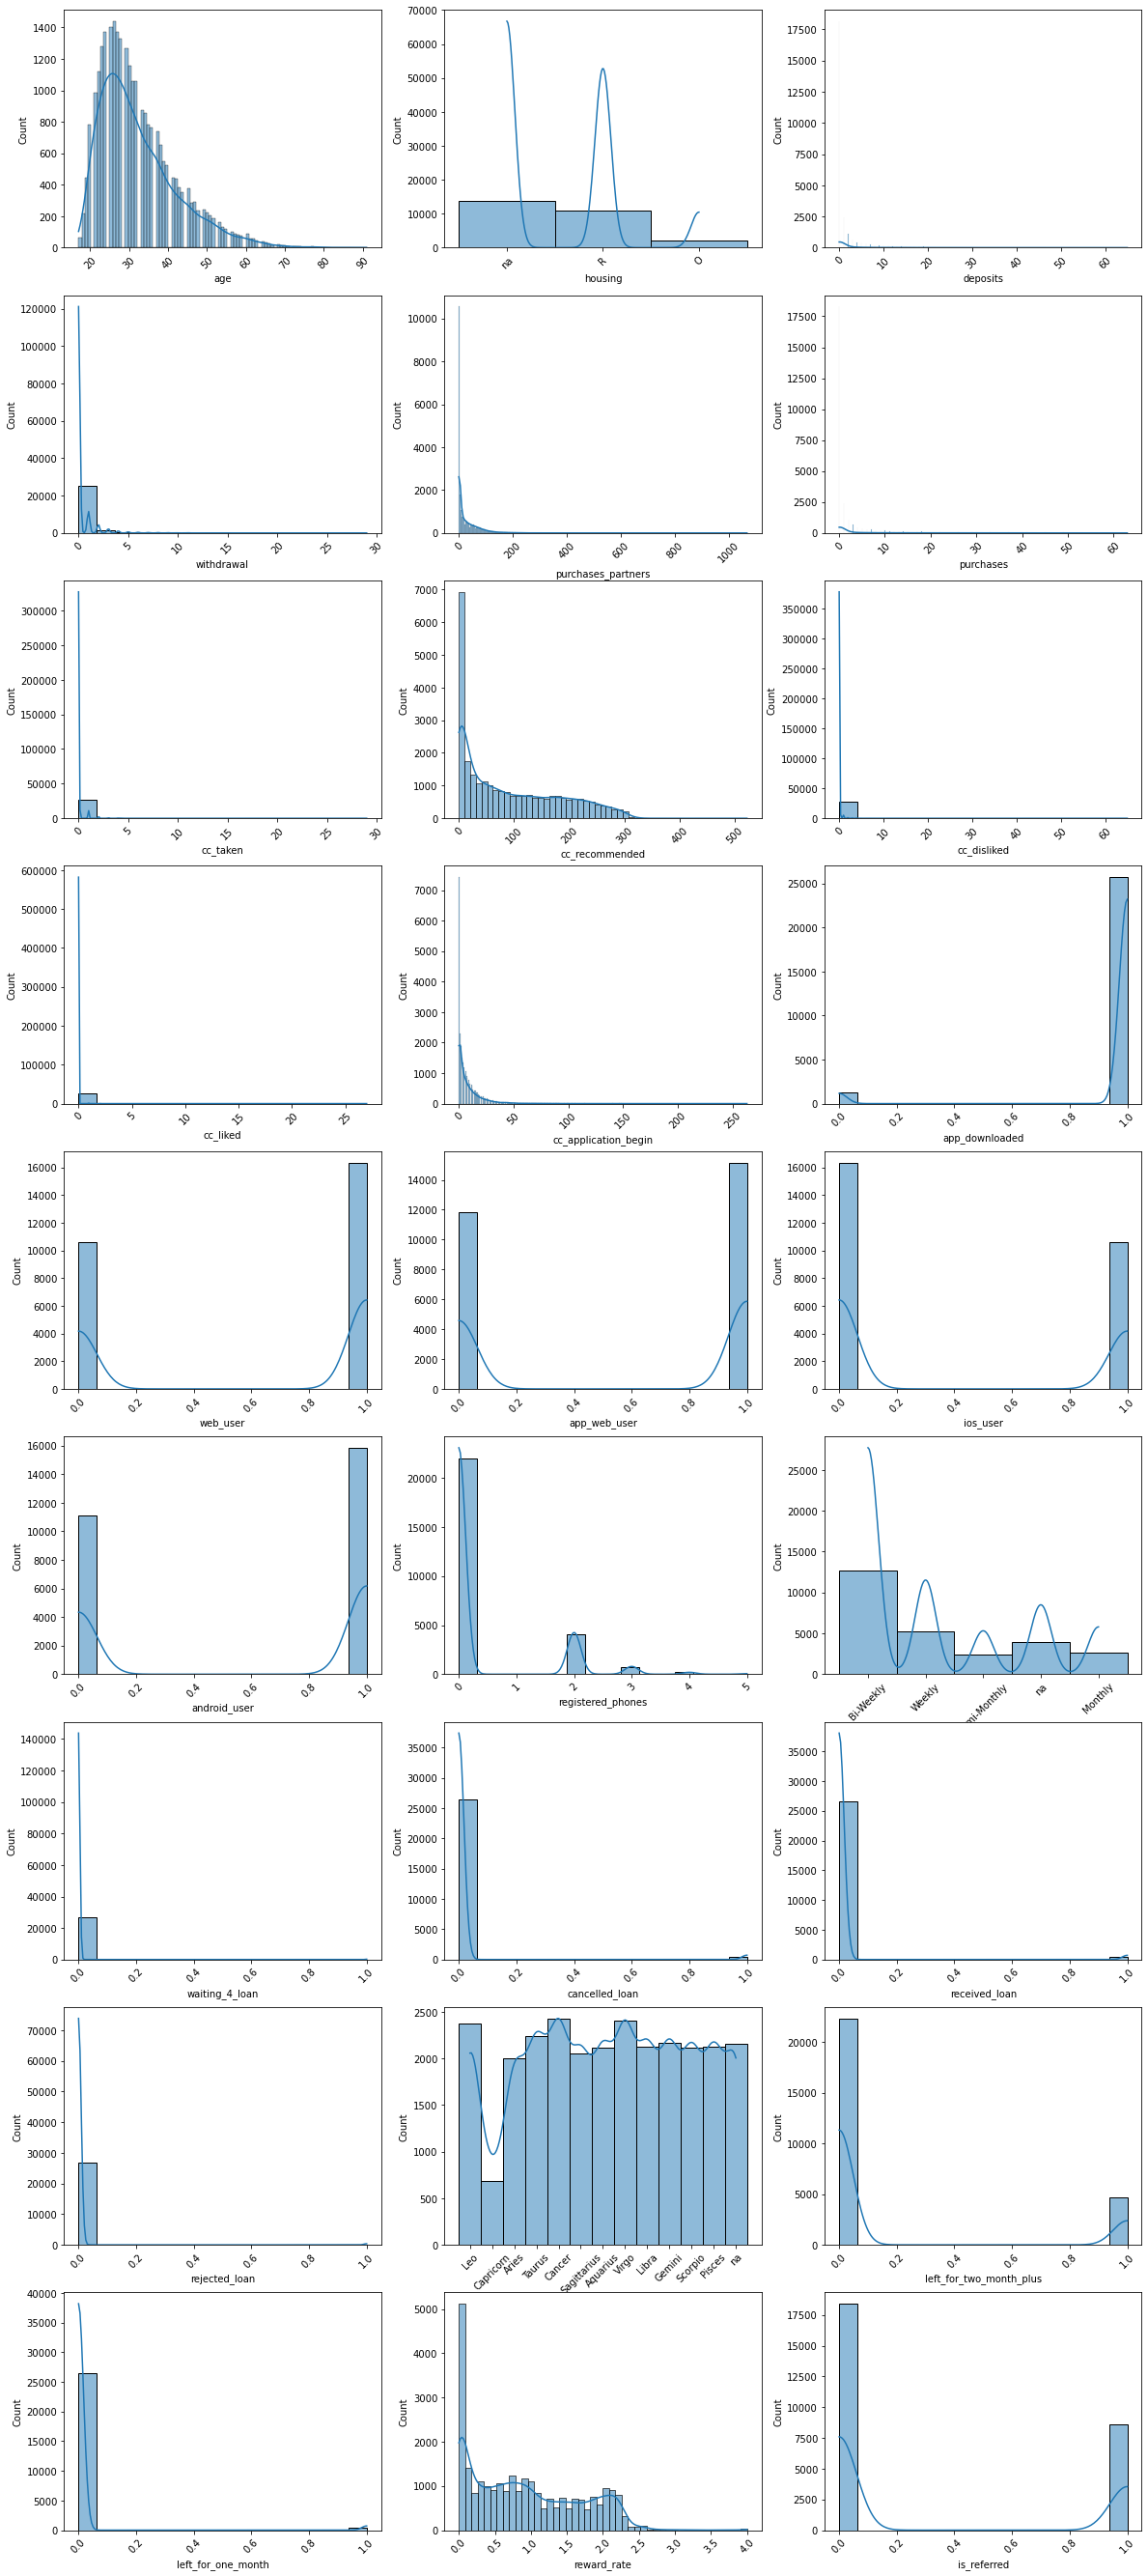

In [65]:
feature = ['age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred']


plt.figure(figsize = (20,48))       # width height
for i in enumerate(feature):
    plt.subplot(9,3,i[0] + 1)      # (rows, columns. index number) it can not be 0. so add 1
    sns.histplot(x = i[1],data = fintech_churn,kde=True)        # Providing the column name
    plt.xticks(rotation=45)

### Results 
- Age distribution shows right skew but that is what we expect with the age (older people may not use) 
- Can notice that most housing data the customers are unclassifed while most of the classified data comes from renters. 
- Deposits, withdrawal and purchases are very right skewed which tells us that majority of people have no deposits.
- Very few customrs have not downloaded the app 
- Create pie charts to view the binary data better.

***

<a id='Binary'></a>
# Examine Binary Data 

- We want to make sure that these variables does not show a distribution very high to make sure that they are useful for us. 
- Do not want to create a high importance due to values being very one-sided.
***

In [81]:
# Use only data that have binary columns 

binary_churn = fintech_churn[['housing', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

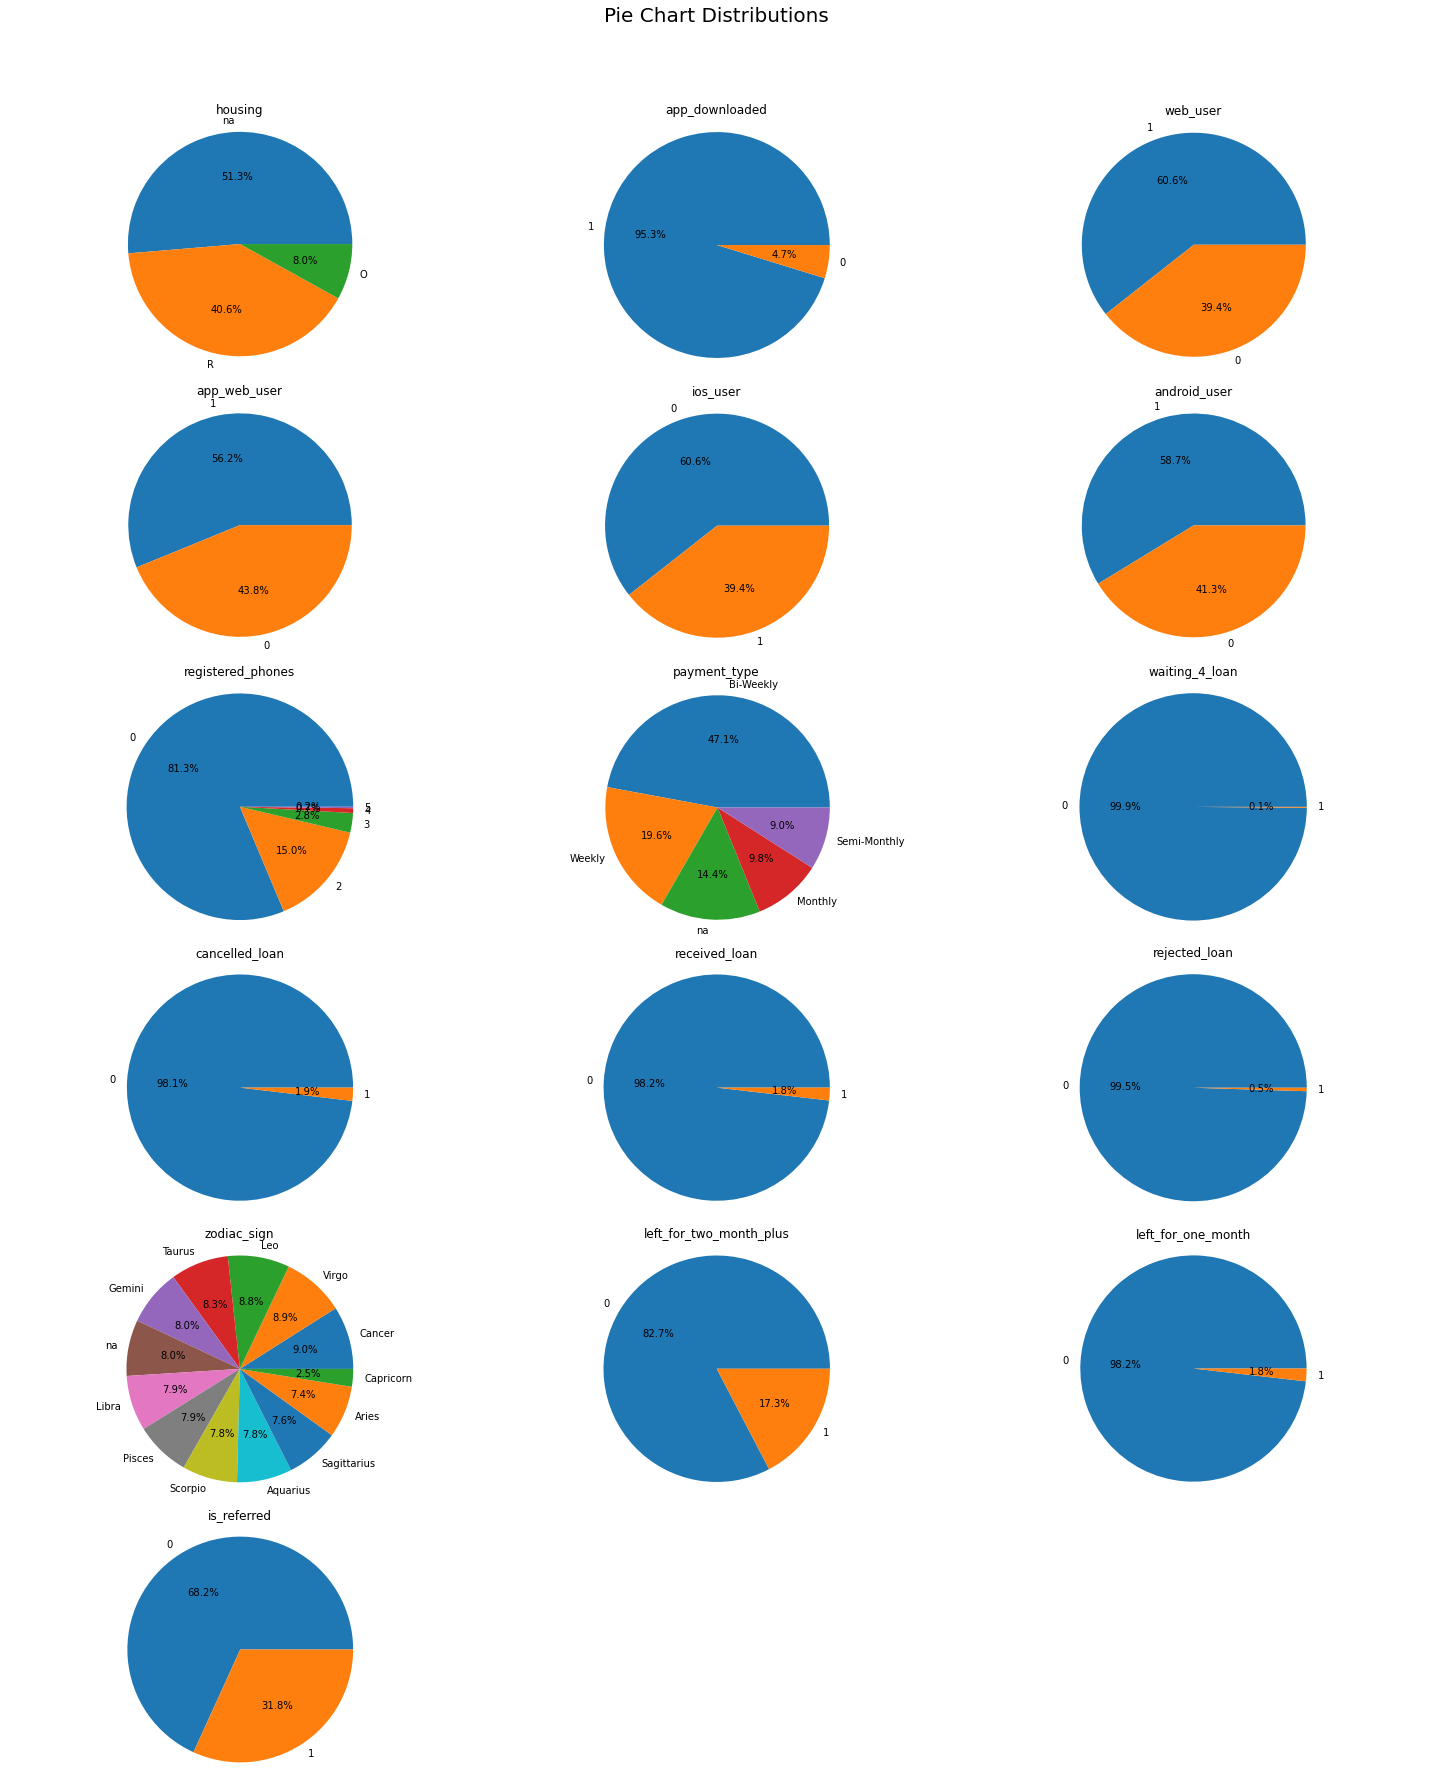

In [85]:
fig = plt.figure(figsize=(20, 26))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, binary_churn.shape[1] + 1):           # iterate each of the columns, we start at 1 and go through the number of columns plus 1  
    plt.subplot(6, 3, i)                                 # 6 rows 5 columns 
    f = plt.gca()                                        # Plot each figure 
    f.axes.get_yaxis().set_visible(False)                # Get rid of y labels 
    f.set_title(binary_churn.columns.values[i - 1])     # Give each individual its subplot by selecting the coloumn values
    
    values = binary_churn.iloc[:, i -1].value_counts(normalize = False).values
    index = binary_churn.iloc[:, i - 1].value_counts(normalize = True).index           # Normalize: turns values into %
    plt.pie(values,labels = index, autopct='%1.1f%%')     # (size of each pie going to be, labels, Tells piechart how to display distributions: float of 1 decimal)
    plt.axis('equal')                                    # Makes sure no x or y value is show or image
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [87]:
# Explore Unven features by subsetting them and doing a value count distribtion

fintech_churn[binary_churn.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [88]:
fintech_churn[binary_churn.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [89]:
fintech_churn[binary_churn.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [90]:
fintech_churn[binary_churn.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [91]:
fintech_churn[binary_churn.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

### Results

- Waiting 4 loan, rejected loan, left for one month, cancelled loan have very small subsets 
- We care because we don't want subsets of data to be so small that there are not enough results for it to include both rows where churn variable are 0 and row variables are 1. 
- Examining the variables that we are concerned about a little deeper. We can assume that there will be no particular bias regarding these features. 

***

<a id='Correlation'></a>
# Examining The Correlation Of The Independent Fields With The Response Variable

- Do not want all features correlated with eachother
- Want to pay attention to explanatory features that are not correlating with each other (features around .75 to pay attention too)
- We want to see which fields will be a stronger predictor when building our model. 

***

,user,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
user,1.000000,0.068663,-0.022443,-0.182143,-0.111446,-0.296324,-0.182230,-0.078437,-0.522829,-0.036996,...,-0.097284,-0.097917,0.015280,0.006195,-0.031182,0.025537,-0.026121,-0.029136,-0.489710,-0.164485
churn,0.068663,1.000000,-0.063206,-0.135381,-0.068543,-0.260784,-0.135921,0.058383,-0.198570,0.009423,...,-0.036626,0.028578,-0.013558,0.035275,0.049960,0.056457,0.005094,0.036134,-0.167193,-0.083241
age,-0.022443,-0.063206,1.000000,0.088757,0.044177,-0.000943,0.088769,0.077199,0.095860,0.005577,...,-0.210068,-0.001354,0.004164,-0.003713,-0.001808,0.011030,-0.022500,0.034534,0.086167,-0.001557
deposits,-0.182143,-0.135381,0.088757,1.000000,0.488902,0.326588,0.998554,-0.047058,0.376123,-0.014680,...,-0.002171,0.040044,-0.002928,0.011381,-0.009439,-0.018501,0.048370,-0.011354,0.267635,0.229957
withdrawal,-0.111446,-0.068543,0.044177,0.488902,1.000000,0.223692,0.488285,-0.040658,0.187423,-0.011105,...,-0.004248,0.047112,0.003173,-0.002577,-0.006240,-0.009826,0.032079,-0.009968,0.125363,0.211614
purchases_partners,-0.296324,-0.260784,-0.000943,0.326588,0.223692,1.000000,0.326529,-0.101511,0.594491,-0.035335,...,0.048343,0.072166,0.000089,0.014012,-0.015040,-0.030989,0.082333,-0.032074,0.432839,0.301542
purchases,-0.182230,-0.135921,0.088769,0.998554,0.488285,0.326529,1.000000,-0.047082,0.376666,-0.014583,...,-0.001371,0.039667,-0.002712,0.011687,-0.009273,-0.018337,0.048654,-0.011511,0.268124,0.230099
cc_taken,-0.078437,0.058383,0.077199,-0.047058,-0.040658,-0.101511,-0.047082,1.000000,0.115100,0.182655,...,-0.044865,0.042719,-0.006079,0.004685,0.046760,0.006387,-0.016006,0.085823,0.149156,-0.025004
cc_recommended,-0.522829,-0.198570,0.095860,0.376123,0.187423,0.594491,0.376666,0.115100,1.000000,0.048076,...,0.093413,0.125966,-0.018087,0.014188,0.044977,-0.037966,0.045625,0.037735,0.877549,0.241626
cc_disliked,-0.036996,0.009423,0.005577,-0.014680,-0.011105,-0.035335,-0.014583,0.182655,0.048076,1.000000,...,0.005893,0.025728,-0.002094,0.011349,0.014676,-0.002854,-0.012925,0.033594,0.060708,-0.009285


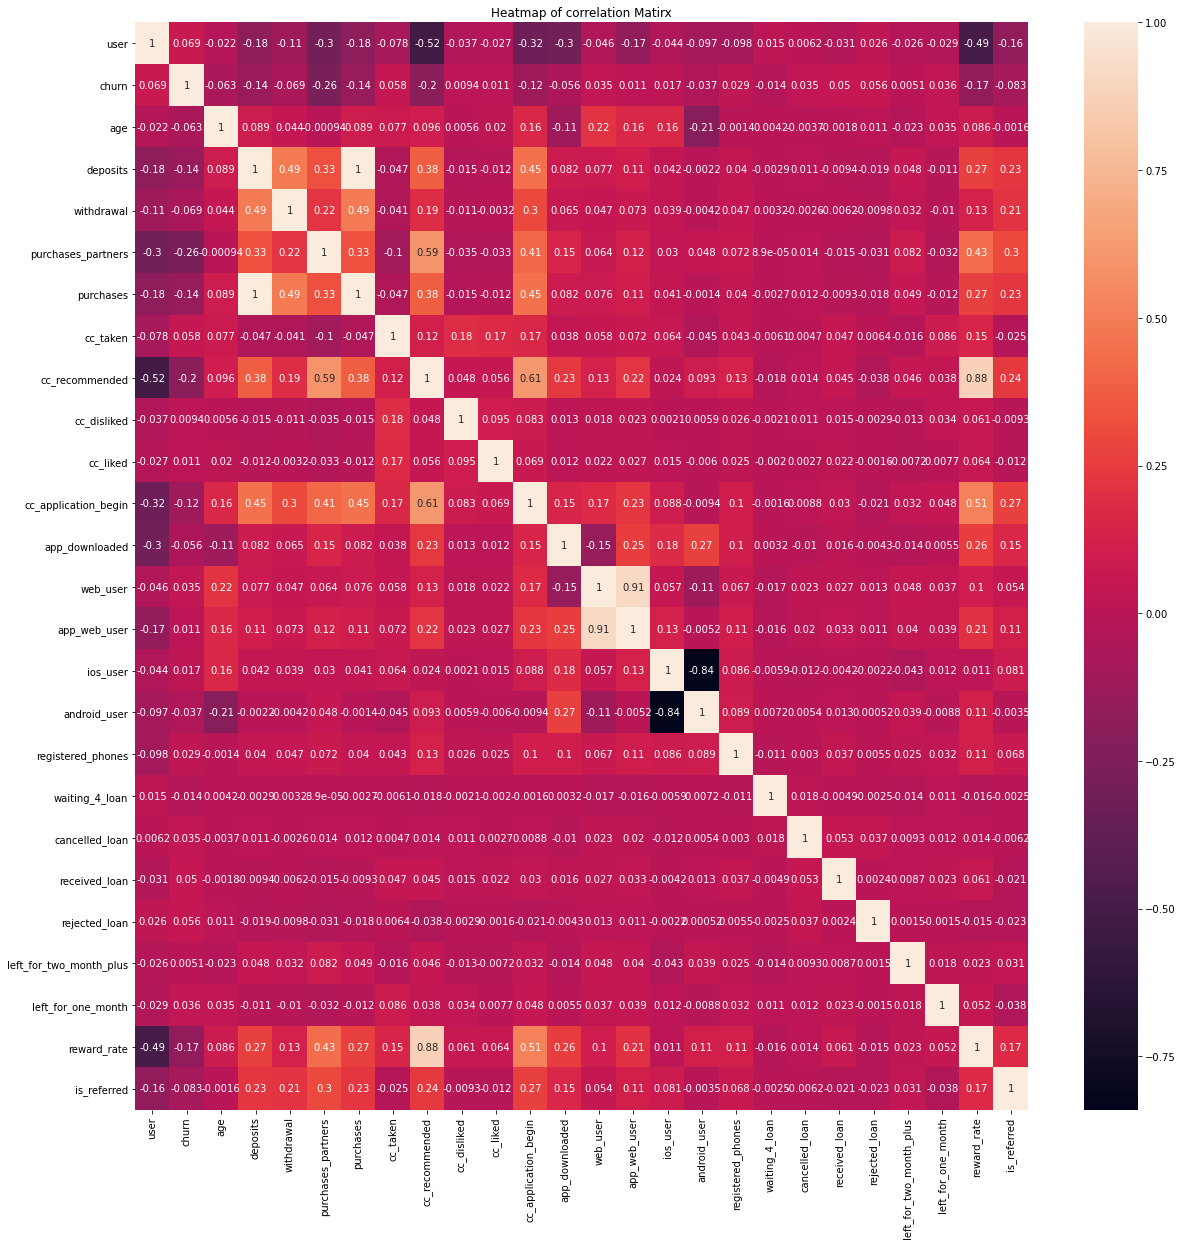

In [108]:
# Create a correlation matrix
corr = fintech_churn.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,
            annot=True,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)
plt.title('Heatmap of correlation Matirx')
corr

<AxesSubplot:title={'center':'Correlation with Response variable'}>

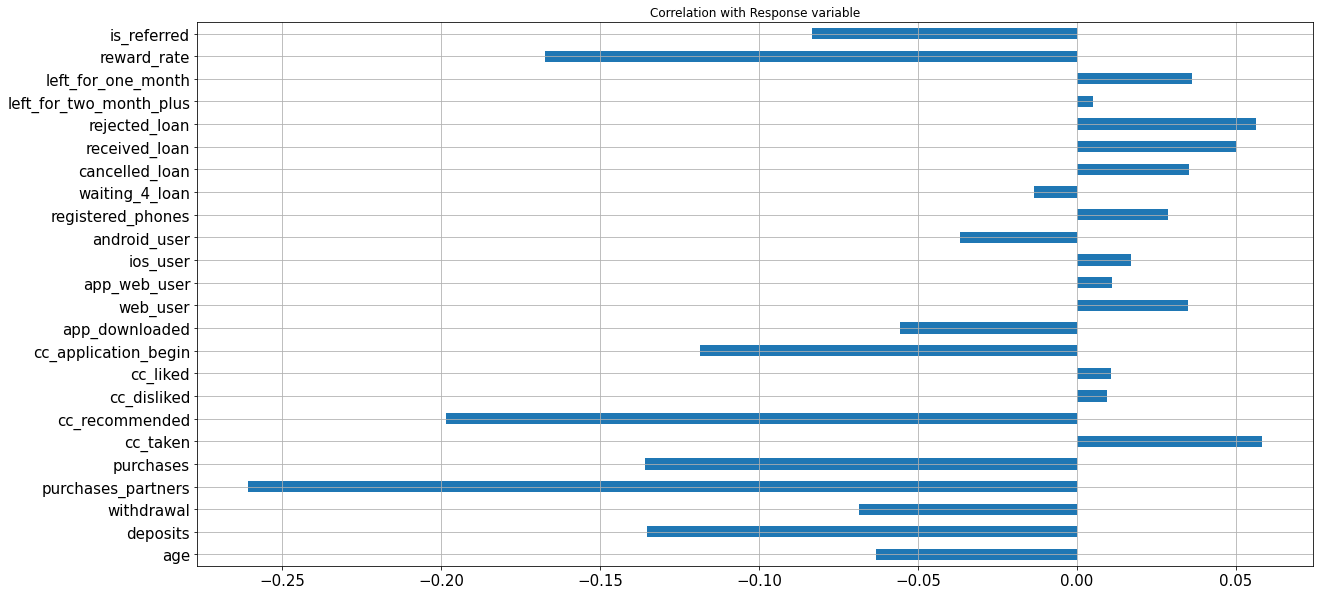

In [138]:
# Data that have all numberical fields 
fintech_churn.drop(columns = ['churn','user','housing', 'payment_type', 'zodiac_sign']).corrwith(fintech_churn.churn).plot.barh(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 0,
              grid = True)

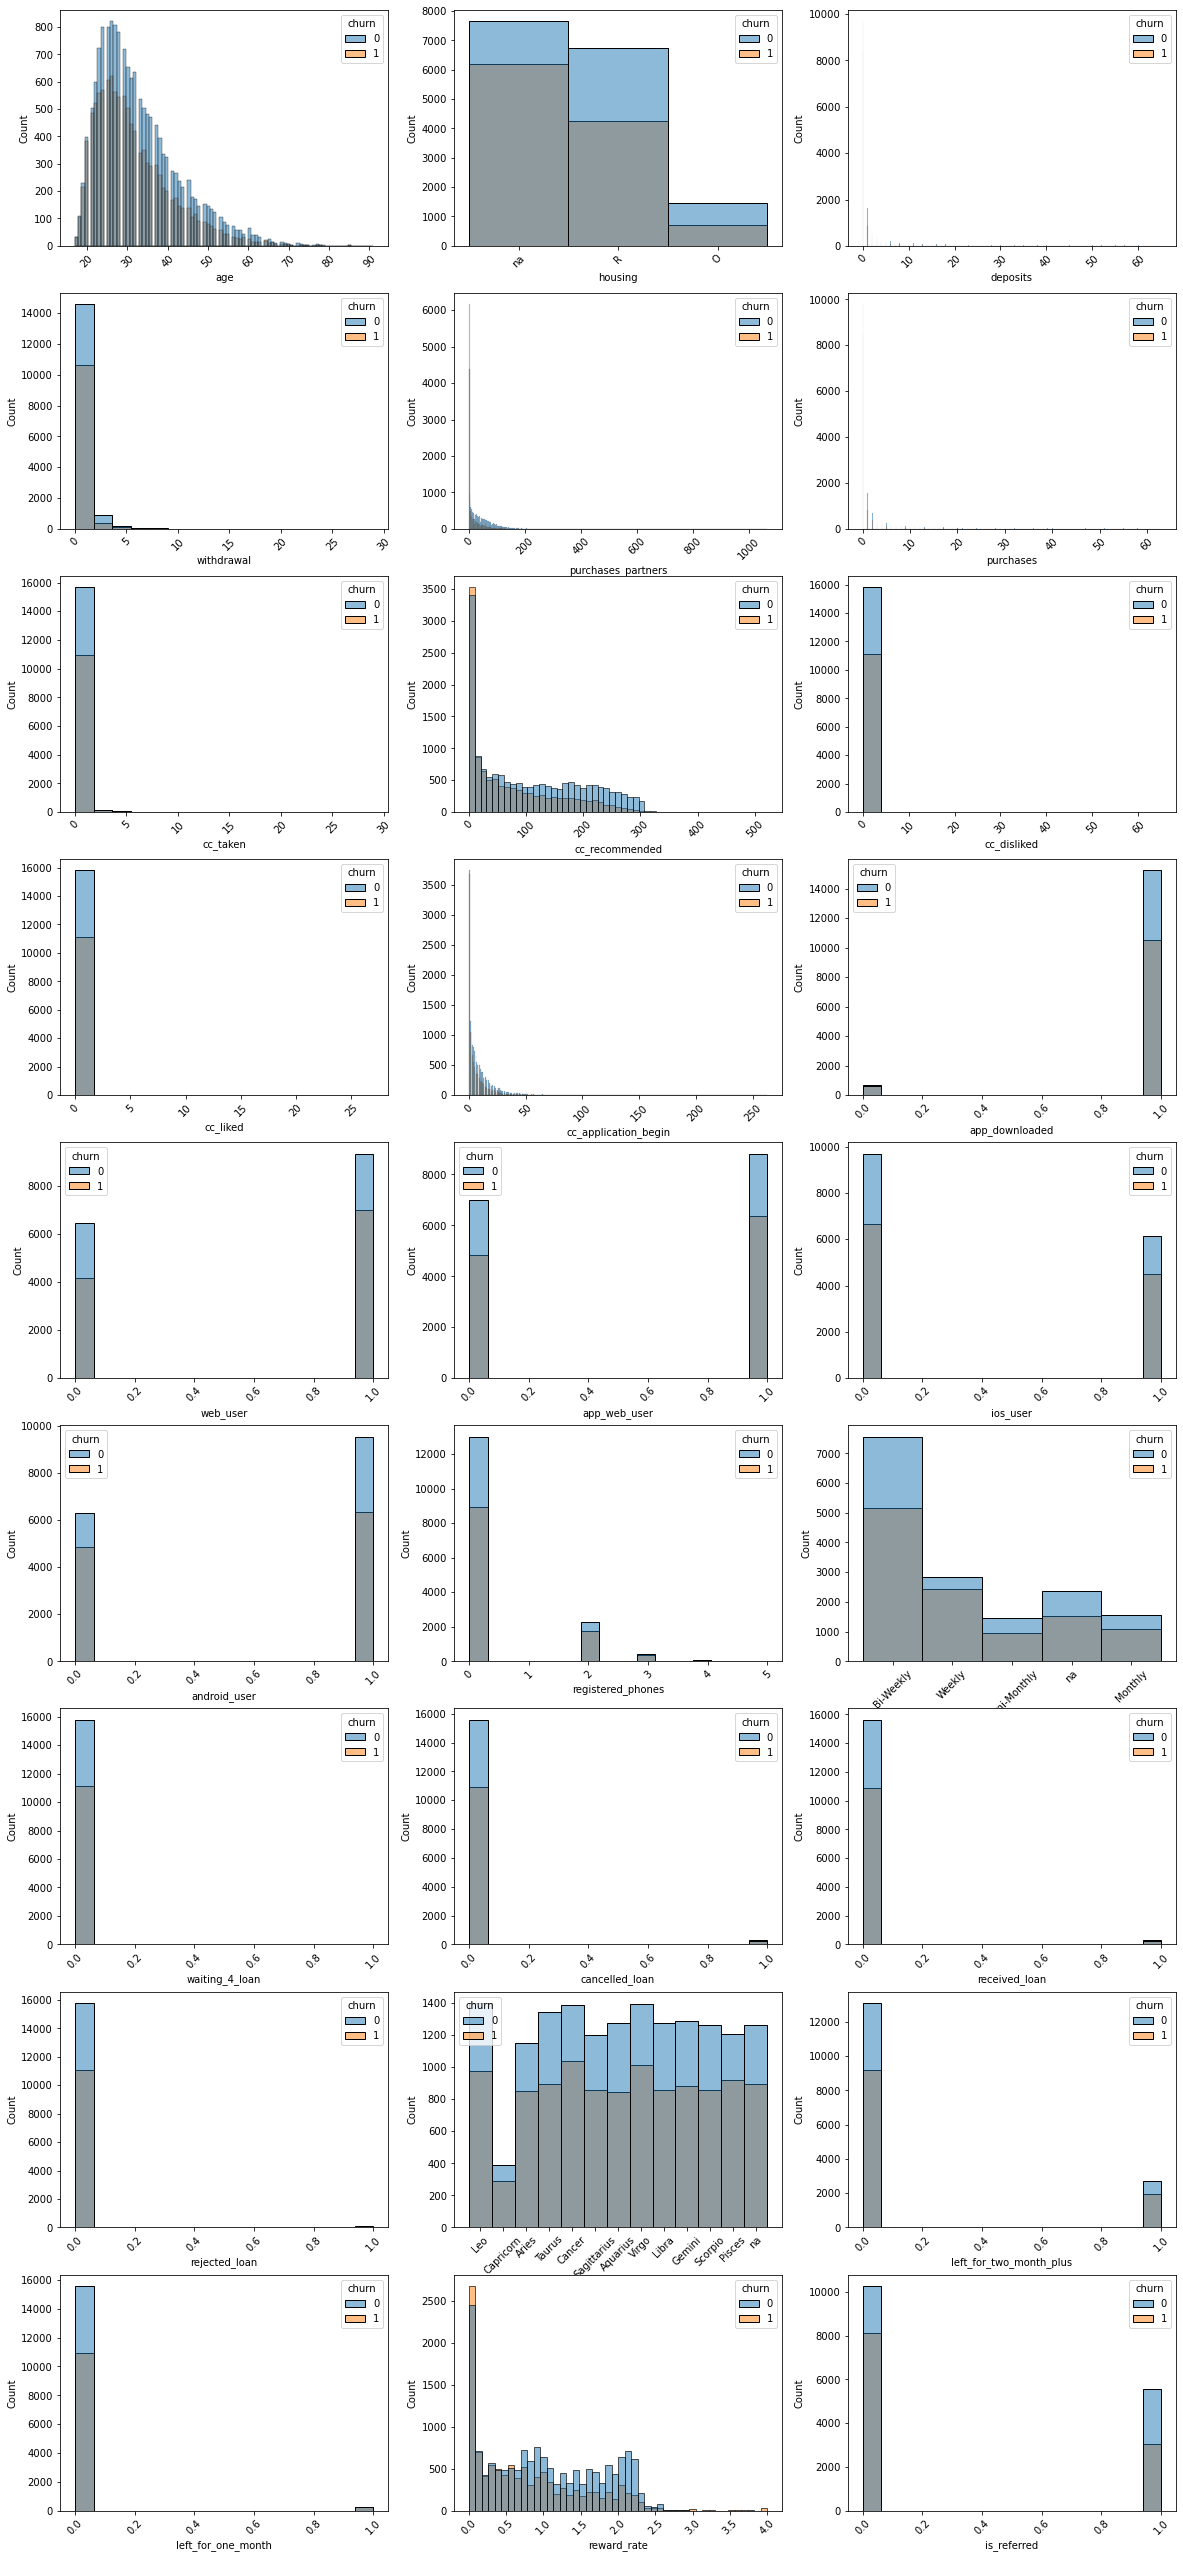

In [128]:
plt.figure(figsize = (20,46))       # width height
for i in enumerate(feature):
    plt.subplot(9,3,i[0] + 1)      # (rows, columns. index number) it can not be 0. so add 1
    sns.histplot(x = i[1], hue = 'churn',data = fintech_churn)        # Providing the column name
    plt.xticks(rotation=45)

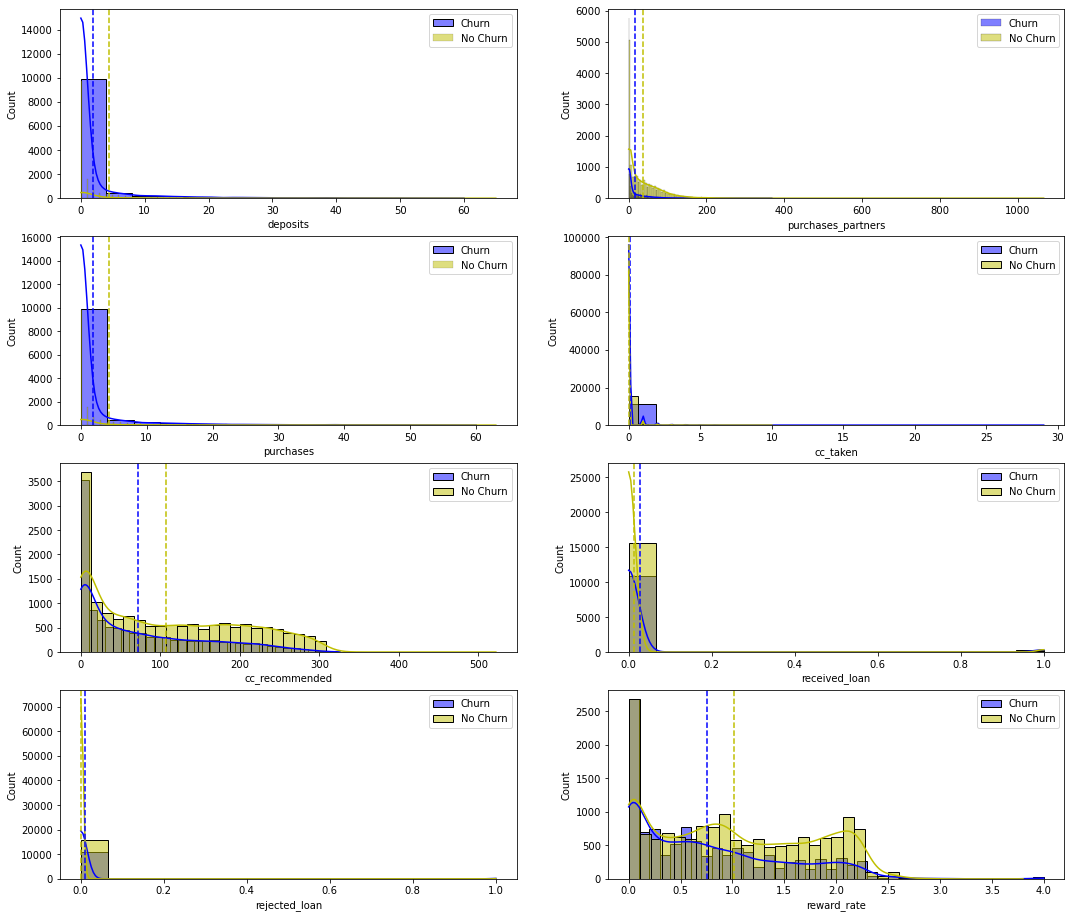

In [131]:
# Just wanted to look at some of the most correlated features. 


# Subsetting by clicks
churn_yes = fintech_churn["churn"] == 1
churn_no = fintech_churn["churn"] == 0

# Creating the plots
features = ['deposits','purchases_partners','purchases', 'cc_taken', 'cc_recommended','received_loan', 'rejected_loan', 'reward_rate']
labels = ["Churn", "No Churn"]

def creating_plots(features, labels):
    plt.figure(figsize=(18,16))    # (width, length)
    for feature in features:
        plt.subplot(4, 2, features.index(feature)+1)
        sns.histplot(fintech_churn[feature][churn_yes], label=labels[0], color="b",kde=True)
        sns.histplot(fintech_churn[feature][churn_no], label=labels[1], color="y",kde=True)
        plt.axvline(fintech_churn[feature][churn_yes].mean(), linestyle = '--', color="b")
        plt.axvline(fintech_churn[feature][churn_no].mean(), linestyle = '--', color="y")
        plt.legend()

creating_plots(features, labels)

### Results 

- Purchases Partners is the most negatively correlated at -0.26 with churn which means that the smaller the purchasing partners are, the more likely the customer will churn. 
- Cc recommended and reward rate are the 2nd and 3rd most negatively correlated which makes sense because the less activity a customer have the more likely the customers is to churn. 
- Cc taken, received loan and rejected loan have the highest positive correlation with churn which means as these variables increases so does the risk of churn. 
- An interesting observation would be that cc liked and cc disliked can possible be correlated. Which tells us that rather a customer liked or disliked any of the products then the customer is more likely to churn. The correlation from these variables to the target varaible isn't that strong. So, this assumption may not hold. 
- It is very interesting to see that the customers that are app web users, web users or an IOS users are more likely to leave compared to android users which are more likely to stay.  
***

<a id='CM'></a>
# Correlation Matrix

***

<AxesSubplot:>

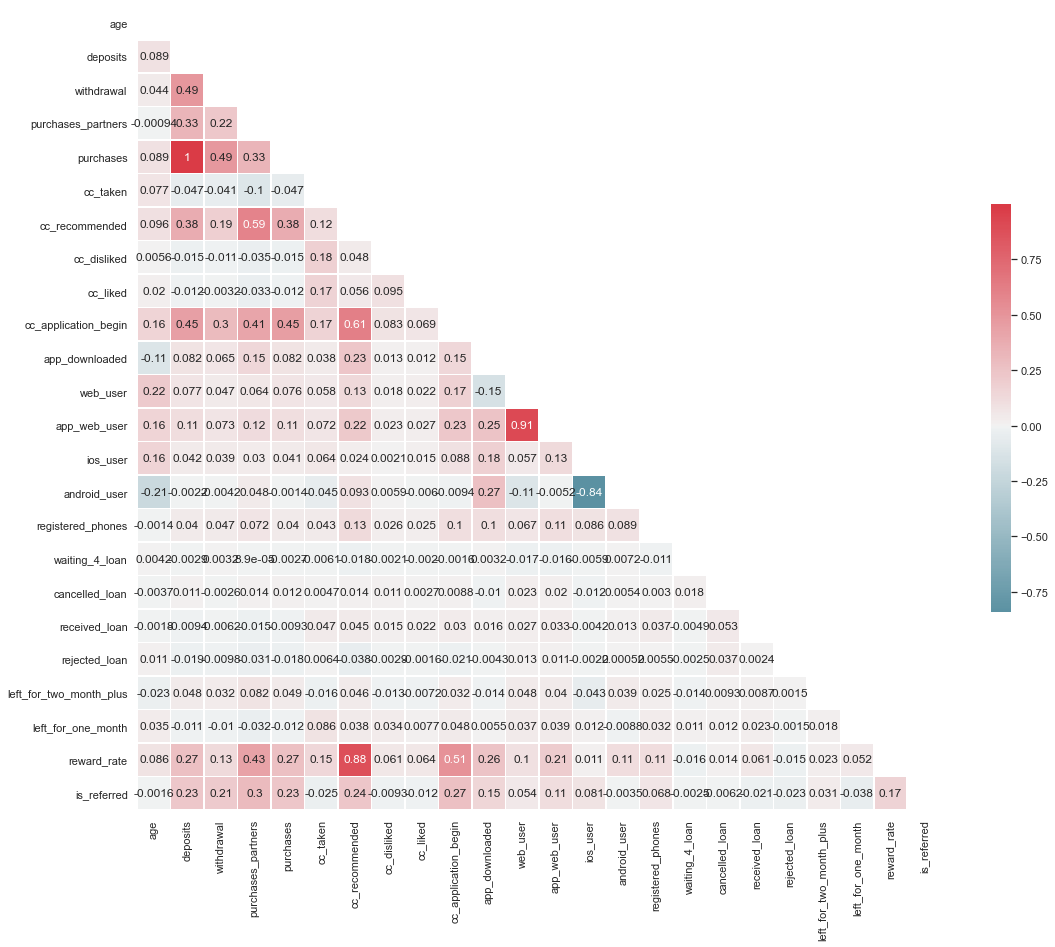

In [153]:
sns.set(style='white')                                                # Uses seaborn to build a white background 
corr = fintech_churn.drop(columns = ['user','churn']).corr()          # Compute the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)                             # Generate a mask for the upper triangle
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(18,15))                                  # Set up the matplotlib figure
cmap = sns.diverging_palette(220,10,as_cmap=True)                     # Generate a custom diverging colormap, Can change this all depending on the resolution of computer



sns.heatmap(corr, mask = mask, cmap = cmap, center = 0,       # Draw the heatmap with the mask and correct aspect ratio
           square=True, linewidth=.5, cbar_kws={'shrink':.5},annot=True)

### Results 

- We can notice right away that two features that are highly correlated with another. 
- Purchases and deposits are a one to one relationship which means if a customer is a 1(churn) on purchases then the deposits customer will be a 0 (not churn). We will have to delete one of these features. 
- Also, We see that app web user and web user are highly correlated at 0.91. 

***

<a id='RD'></a>
# Removing Data
- Although there are somewhat highly correlated fields, they are not colinear
- These feature are not functions of each other, so they won't break the model
- But these feature won't help much either. Feature Selection should remove them.

***

In [156]:
# Just randomly choose one of the two very highly correlated fields to drop. 

fintech_churn_drop = fintech_churn.drop(columns = ['app_web_user','deposits'])
fintech_churn_drop.head()

,user,churn,age,housing,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,1,0,0,96,0,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,2,86,47,0,285,0,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,3,38,25,0,74,0,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,2,0,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [158]:
# Saving data

fintech_churn_drop.to_csv('new_fintech_churn.csv', index = False)

<a id='One'></a>
# One Hot Encoding

- Use one hot encoding because it applies to non-ordered categorical data, treats each value as it's own and put it into its own feature 

***

In [259]:
fintech_clean = pd.read_csv('Data/new_fintech_churn.csv')
fintech_clean.head()

,user,churn,age,housing,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,1,0,0,96,0,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,2,86,47,0,285,0,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,3,38,25,0,74,0,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,2,0,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [260]:
# Separate user away from dataset to use at end to match the predictions to the users that they came from.

user_identifier = fintech_clean['user']
fintech_clean = fintech_clean.drop(columns = ['user'])

In [261]:
fintech_clean.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [262]:
fintech_dummies = pd.get_dummies(fintech_clean)
fintech_dummies.columns

Index(['churn', 'age', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [263]:
# Will get rid of the columns that contain na becasue the 'na' will always be one due to other columns that pertain to the same feature will be 0 which creates a correlation. 
# Also, provides no real insight besides it is unknown. 

fintech_dummies = fintech_dummies.drop(columns = ['housing_na','zodiac_sign_na','payment_type_na'])
fintech_dummies.columns

Index(['churn', 'age', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly',
       'zodiac_sign_Aquarius', 'zodiac_sign_Aries', 'zodiac_sign_Cancer',
       'zodiac_sign_Capricorn', 'zodiac_sign_Gemini', 'zodiac_sign_Leo',
       'zodiac_sign_Libra', 'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius',
       'zodiac_sign_Scorpio', 'zodiac_sign_Taurus', 'zodiac_sign_Virgo'],
      dtype='object')

<a id='train_test'></a>
# Train Test Split 

***

In [264]:
# 20% going to testing data

X_train, X_test, y_train, y_test = train_test_split(fintech_dummies.drop(columns = 'churn'),
                                                   fintech_dummies['churn'],
                                                   test_size=0.2,
                                                   random_state=0)

In [265]:
# Just checking 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21596, 40)
(21596,)
(5400, 40)
(5400,)


<a id='FS'></a>
# Feature Scaling And Balancing training set

- Model is 60% - if there are 60% of zeros in the response variable and 40% ones and the model chooses all them to be zero (bias model). The accuracy will still be at 60% mark because it will be guessing incorrectly. We can try to balance the training set to avoid this problem. 

- Balance the amount of zeros and ones that the training set has in its response variable. This will guarantee that whatever accuracy we see in our model is a result of the model itself and not a random pick of how many zeros and ones are in the response variable for the training set.

- Normalizing all numerical fields

***

In [266]:
# Seems pretty normally spread out 
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [267]:
y_train.value_counts() / y_train.shape[0]

0    0.586034
1    0.413966
Name: churn, dtype: float64

In [268]:
# splitting the data into it's positive and negative values 

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [252]:
# Selecting which of them are the higher list and which ones are the smaller list
# We subset higher into a subset that is as big as the lower by chopping some of those values (randomly select values)

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size = len(lower))      # Randomly select the indexes of higher of size len of lower
lower = np.asarray(lower)
new_indexes = np.concatenate((lower,higher))

# subset training set by the values we have selected 
X_train = X_train.loc[new_indexes, ]
y_train = y_train[new_indexes, ]

ValueError: key of type tuple not found and not a MultiIndex

In [226]:
# ignore_index=True

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.reindex([new_indexes, ])
y_train = y_train[new_indexes]

ValueError: cannot reindex from a duplicate axis

TypeError: object of type 'method' has no len()

In [225]:
X_train[X_train.index.duplicated()]
X_train = X_train.loc[:,~X_train.columns.duplicated()]

In [213]:
X_train[X_train.index.duplicated()]

,age,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
18083,26.0,0,86,0,0,212,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18255,26.0,1,55,1,0,227,0,0,17,1,...,0,0,0,0,0,0,0,0,0,0
11011,37.0,0,64,60,0,305,0,0,59,1,...,0,0,1,0,0,0,0,0,0,0
11598,24.0,0,32,0,0,76,0,0,2,1,...,0,0,0,0,0,0,0,1,0,0
18375,34.0,0,4,0,0,10,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25726,45.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11305,31.0,0,26,0,0,64,0,0,3,1,...,0,0,0,1,0,0,0,0,0,0
4477,36.0,0,29,1,0,80,0,0,3,1,...,0,0,0,0,0,0,1,0,0,0
16376,31.0,0,33,0,0,93,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0


In [269]:
# Create new training set 
# Scaler turns it into a numpy array which will lose the index of the rows and column names ( We do not want that)



sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))    # Fit first for X_train then transform in place
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values               # Extract column values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values                   # Extract index values 
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [270]:
X_test

,age,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
2834,-0.028512,-0.290940,-0.637903,0.855323,2.072260,1.189299,-0.058110,-0.069033,1.815324,0.222075,...,-0.310232,-0.158462,-0.295470,-0.310859,-0.295377,-0.292309,3.458726,-0.293427,-0.299619,-0.313539
21018,-0.729144,-0.290940,2.338855,-0.367002,-0.165814,1.649663,-0.058110,-0.069033,-0.418466,0.222075,...,-0.310232,-0.158462,3.384441,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539
5590,1.472841,1.587988,-0.661342,0.855323,-0.165814,0.392082,2.246665,-0.069033,2.134437,0.222075,...,-0.310232,-0.158462,-0.295470,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,3.337575,-0.313539
15769,0.071578,-0.290940,-0.473830,-0.367002,-0.165814,-1.022698,-0.058110,-0.069033,-0.578023,0.222075,...,-0.310232,6.310642,-0.295470,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539
15120,-1.029415,-0.290940,3.018587,0.299721,-0.165814,1.683349,-0.058110,-0.069033,2.054658,0.222075,...,-0.310232,-0.158462,-0.295470,3.216892,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16090,4.475548,-0.290940,-0.661342,-0.367002,-0.165814,-1.033926,-0.058110,-0.069033,-0.657801,0.222075,...,-0.310232,-0.158462,-0.295470,-0.310859,-0.295377,-0.292309,3.458726,-0.293427,-0.299619,-0.313539
9851,0.572029,0.648524,-0.637903,-0.255882,-0.165814,-1.045154,-0.058110,-0.069033,-0.657801,0.222075,...,-0.310232,-0.158462,-0.295470,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539
654,0.471939,-0.290940,-0.661342,-0.367002,2.072260,1.234212,-0.058110,-0.069033,-0.099353,0.222075,...,-0.310232,-0.158462,-0.295470,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,3.337575,-0.313539
26248,-0.528964,-0.290940,0.299658,-0.144761,-0.165814,-0.326536,-0.058110,-0.069033,-0.418466,0.222075,...,-0.310232,-0.158462,-0.295470,-0.310859,-0.295377,-0.292309,3.458726,-0.293427,-0.299619,-0.313539


<a id='ms'></a>
# Model Selection

- Logistic Regression

***

In [271]:
# fitting model to the training set 

classifier = LogisticRegression(random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [272]:
# Evaluating results 

cm = confusion_matrix(y_test,y_pred)

In [273]:
# Accuracy score

accuracy_score(y_test,y_pred)

0.642962962962963

In [274]:
# Precision Score - The score of the TP / TP + FP
# Of all the positives predicted how many of them are acturally true

precision_score(y_test,y_pred)

0.582258064516129

In [275]:
# Recall - TP / TP + FN
# Of all the acutually positives that exist how many did we predict as true 

recall_score(y_test,y_pred)

0.4847806624888093

In [276]:
f1_score(y_test,y_pred)

0.529066927210552

Ex: Decent accuracy but a poor precision and high recall. We can use the F! score to give us a better measure of how our model is performing. 

Test Data Accuracy: 0.6430


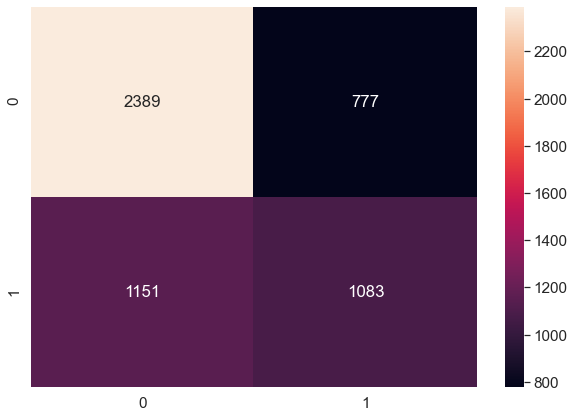

In [278]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

- 2389 means predictions of 0 when the value was actually 0
- 

In [279]:
# K-fold cross validation 


accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.652 (+/- 0.017)


In [280]:
# Analyzing Coefficients
# Seeing which feild is more important when predicting the response variable 
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])          # Use transpose because it is a row we want to change it to columns 
           ],axis = 1)                                                               # Tell it to be colums not rows 

,features,coef
0,age,-0.169529
1,withdrawal,0.051129
2,purchases_partners,-0.778585
3,purchases,-0.137312
4,cc_taken,0.070329
5,cc_recommended,0.075371
6,cc_disliked,-0.013481
7,cc_liked,0.000151
8,cc_application_begin,0.027848
9,app_downloaded,-0.012872


- Web User and received loan are higher than the average
- Purchases partners and reward rates are very high ( Extremly important in predicting the response variable) 

## Feature Selection
# Recursive Feature Elimination

- Shorten the amount of columns we need to get the same accuracy that we had before. 
- Faster for model production
- Only use the features that hold significance and predicitive power

In [282]:
# Model to test 

classifier = LogisticRegression()

# Select top features. We have 40 columns in X_train. So, we will make it 20
rfe = RFE(classifier, n_features_to_select=20)

# Fit model 
rfe = rfe.fit(X_train,y_train)

In [283]:
# See what attributes are useful

print(rfe.support_)

[ True  True  True  True  True  True False False False False  True  True
 False  True  True  True  True  True  True  True  True False  True  True
 False False False  True False False False  True False False False False
 False False False False]


In [284]:
# Now we can see the columns that was actually included. The 20 fields that model sees as the best predictor 

X_train.columns[rfe.support_]

Index(['age', 'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'web_user', 'ios_user', 'registered_phones',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'housing_O', 'housing_R', 'payment_type_Weekly',
       'zodiac_sign_Capricorn'],
      dtype='object')

In [285]:
# Can see the rankings 
# 1 represents fields that are included (Mapping to the true)
# Rest are ranked by importance.
# Ex: 2 not included in top 20 but it is the 21st more important value 

rfe.ranking_

array([ 1,  1,  1,  1,  1,  1, 13, 21,  2, 17,  1,  1, 18,  1,  1,  1,  1,
        1,  1,  1,  1,  6,  1,  1,  3, 11,  4,  1,  5, 16, 14,  1,  7, 19,
        9, 12, 20, 10,  8, 15])

### Now use the the top features for model 

In [288]:
# Now use the the top features for model 

classifier = LogisticRegression(random_state=0)

classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(random_state=0)

In [289]:
y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [295]:

print("\nTop Features Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("Final precision score on the testing data: {:.4f}".format(precision_score(y_test, y_pred)))
print("Final recall score on the testing data: {:.4f}".format(recall_score(y_test, y_pred)))
print("Final f1 score on the testing data: {:.4f}".format(f1_score(y_test, y_pred)))


Top Features Model
------
Final accuracy score on the testing data: 0.6461
Final precision score on the testing data: 0.5869
Final recall score on the testing data: 0.4884
Final f1 score on the testing data: 0.5331


Test Data Accuracy: 0.6461


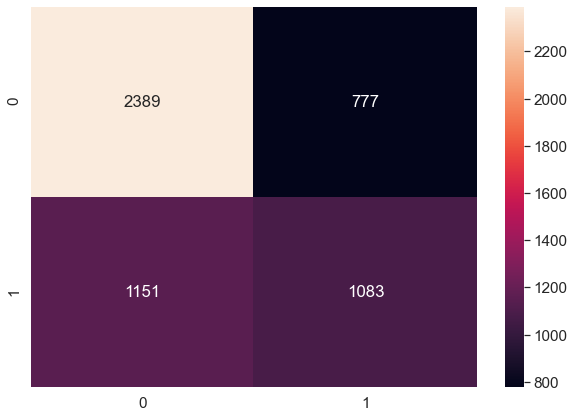

In [296]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

# Finalize Model 
- 1st gauage all the coefficents of the 20 fields and at end. Put all results together. 

In [297]:
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.164479
1,withdrawal,0.056112
2,purchases_partners,-0.768479
3,purchases,-0.129883
4,cc_taken,0.072041
5,cc_recommended,0.093679
6,web_user,0.135112
7,ios_user,0.072808
8,registered_phones,0.094636
9,waiting_4_loan,-0.040033


In [298]:
# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()                              # combine results of test set, identifier for the user and use 1 becasue we want columns 
final_results['predicted_churn'] = y_pred                                                            # Adding predicting results 
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)           # Re order the columns 

In [301]:
final_results.head(50)

,user,churn,predicted_churn
0,61353,1.0,0
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
5,28827,0.0,0
6,58305,1.0,0
7,2351,0.0,0
8,11790,0.0,1
9,46727,0.0,0


<a id='conclusion'></a>
# Conclusion and Final Remarks 



- Fintech can try to somehow direct more customers to downloading the app becasue analysis shows. The customers that downloaded the app are more likely not to churn
- The more the cusomers applications begin the more likely the customers will stay with the company. 
- Can play around with a lower amount of columns to see if score increases but do not want to rely on a few columns. We want to keep some flexiblity. 
- Model Provided us with an indication of which users are likely to churn.
- There is no time data. So, we can not tell when users may acutully churn. We focus on the exact features that indicate disengagement with the product. 



- Business can build new features for the people who are losing interest
- Can move forward with these efforts by inquiring the opinions of our users about our new features (polls). 
- If we want to transition into predicting churn more accurately, in order to put emphasis strictly on those leaving us, then we cn add atime dimension to churn, which would add more accuracy to our model

***

# Testing 

In [42]:
fintech_churn.columns

Index(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred'],
      dtype='object')

<AxesSubplot:xlabel='housing', ylabel='count'>

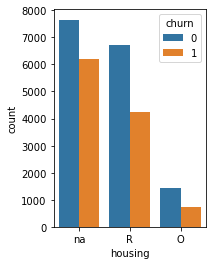

In [46]:
# plt.subplot ( Total number of rows, total number of columns, plot number)
plt.subplot(1,2,1)
sns.countplot(x = 'housing', hue = 'churn',data = fintech_churn)

<AxesSubplot:xlabel='withdrawal', ylabel='count'>

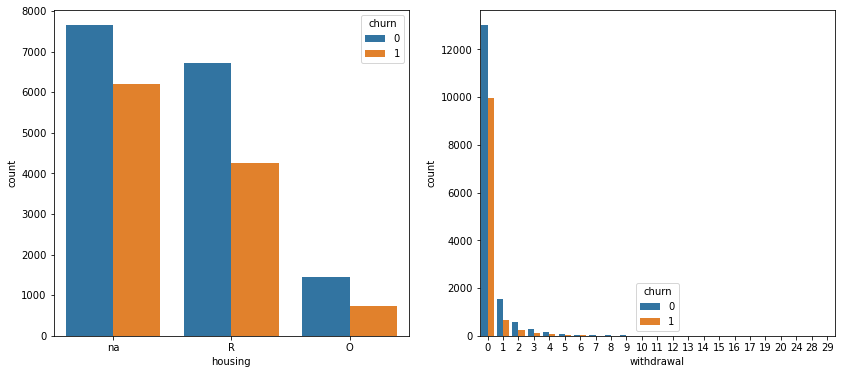

In [51]:
# only the positional argument changes which is the last number of the 3 (1,,2,"#")

plt.figure(figsize= (14,6))    # width, height
plt.subplot(1,2,1)
sns.countplot(x = 'housing', hue = 'churn',data = fintech_churn)

plt.subplot(1,2,2)
sns.countplot(x = 'withdrawal', hue = 'churn',data = fintech_churn)

In [52]:
feature = ['age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred']

In [53]:
# Create index along with column names

list(enumerate(feature))

[(0, 'age'),
 (1, 'housing'),
 (2, 'deposits'),
 (3, 'withdrawal'),
 (4, 'purchases_partners'),
 (5, 'purchases'),
 (6, 'cc_taken'),
 (7, 'cc_recommended'),
 (8, 'cc_disliked'),
 (9, 'cc_liked'),
 (10, 'cc_application_begin'),
 (11, 'app_downloaded'),
 (12, 'web_user'),
 (13, 'app_web_user'),
 (14, 'ios_user'),
 (15, 'android_user'),
 (16, 'registered_phones'),
 (17, 'payment_type'),
 (18, 'waiting_4_loan'),
 (19, 'cancelled_loan'),
 (20, 'received_loan'),
 (21, 'rejected_loan'),
 (22, 'zodiac_sign'),
 (23, 'left_for_two_month_plus'),
 (24, 'left_for_one_month'),
 (25, 'reward_rate'),
 (26, 'is_referred')]